# Grids and ticks

This section demonstrates options available for axes grids and ticks.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

Optionally set design theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Grids

Grid properties apply to a specific axis: 
<ul>
<li>major vs. minor</li>
<li>`x` vs. `x2` vs. `y` vs. `y2`
</ul>

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> allows you to adjust all major and all minor grids together (using `grid_major_` as a keyword prefix) or to adjust only a specific axis (using `grid_major_<x|y|x2|y2>_` as a keyword prefix.

### Major grid

By default, only major gridlines for the <i>primary</i> axes are visible in a plot.  Notice below that the secondary y-axis has tick marks only.

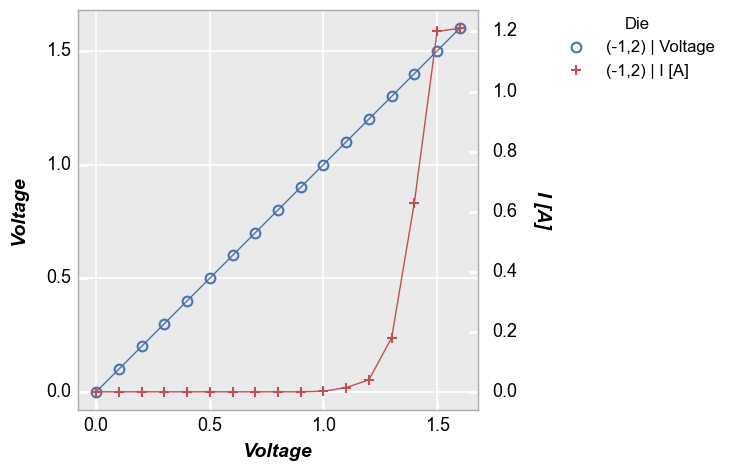

In [5]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

We can disable both primary gridlines using the `grid_major` keyword:

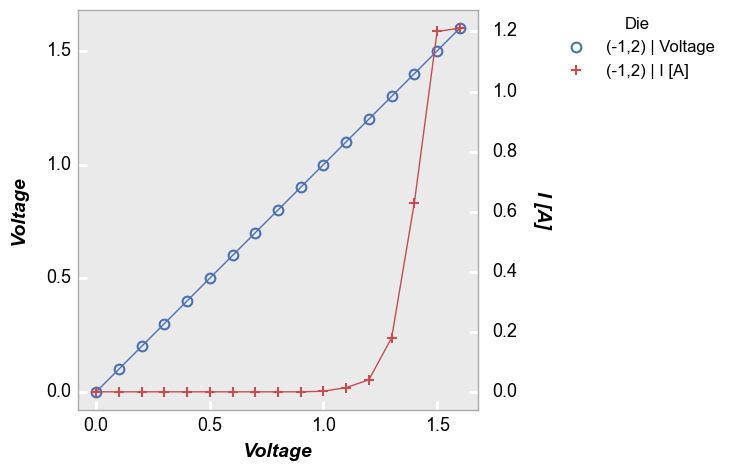

In [6]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major=False)

Or just disable one gridline by specifying the axis of interest in our keyword:

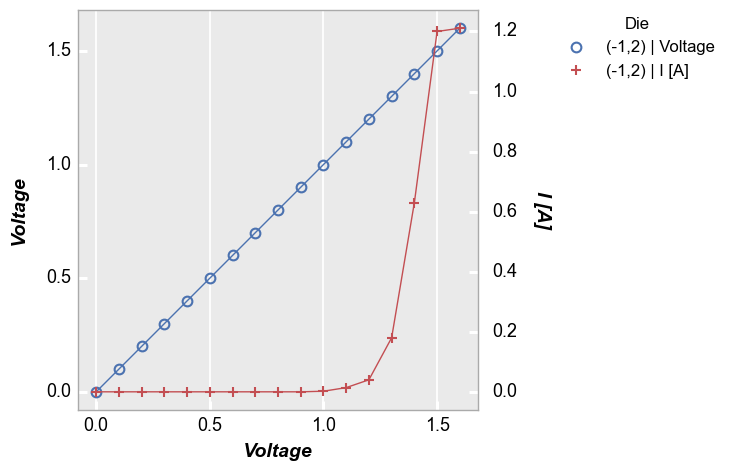

In [7]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major_y=False)

We can also turn on the secondary y-axis grid and give it a distinct look:

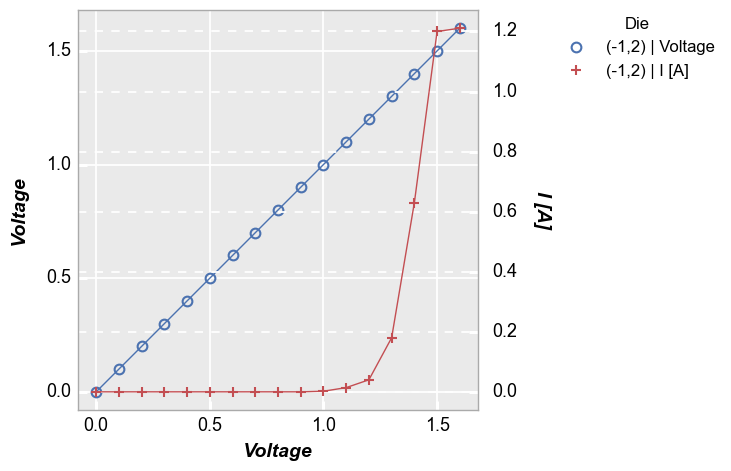

In [8]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major_y2=True, grid_major_y2_style='--')

Unfortunately when using the matplotlib engine, the secondary grid lies above the plot on the primary grid which is not ideal.  This is why the secondary grid lines are disabled by default.

### Minor grid

Minor grids are off by default by can be enabled and styled using either the `grid_minor` family of keywords to batch address all primary axes or the `grid_minor_<x|y|x2|y2>` family of keywords to change a single axis.

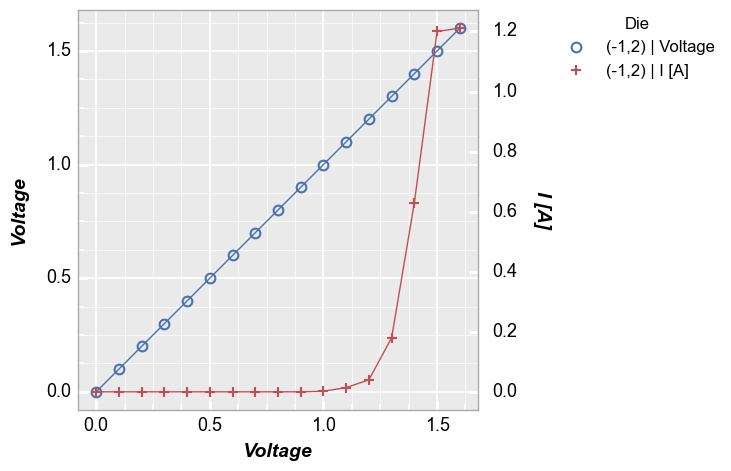

In [9]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_minor=True)

## Tick marks

### Visibility

Tick marks are controlled by keywords with the prefix `ticks_major` or `ticks_minor` and, like gridlines, can be controlled as one for major and minor ticks or by specific axis.  They enabled by default on the inside of the plot whenever a grid line is enabled.  However, you can enable tick marks without enabling grid lines:

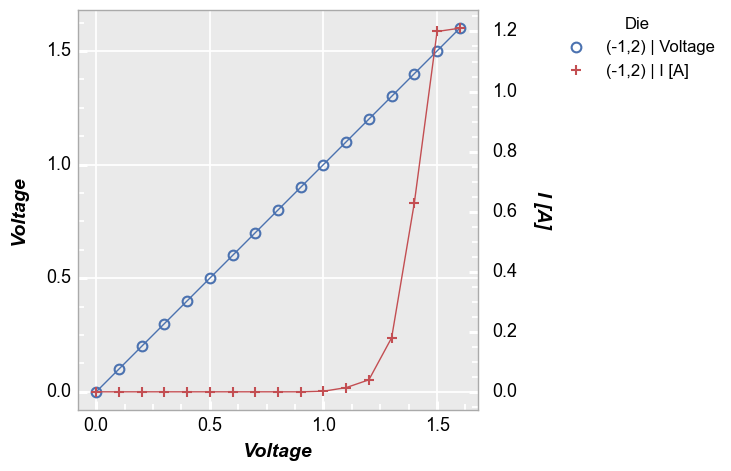

In [10]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_minor=True)

### Style

All tick mark parameters can be changed via keywords at the time of plot execution or in the theme file.  Consider the option below:

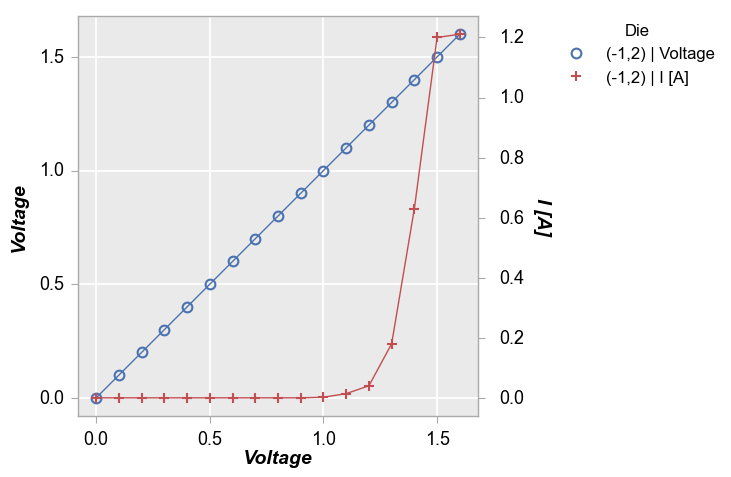

In [11]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major_direction='out', ticks_major_color='#aaaaaa', ticks_major_length=5, ticks_major_width=0.8)

### Increment

Instead of specifying a number of tick marks to display, for major tick marks in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> we specify the tick increment.

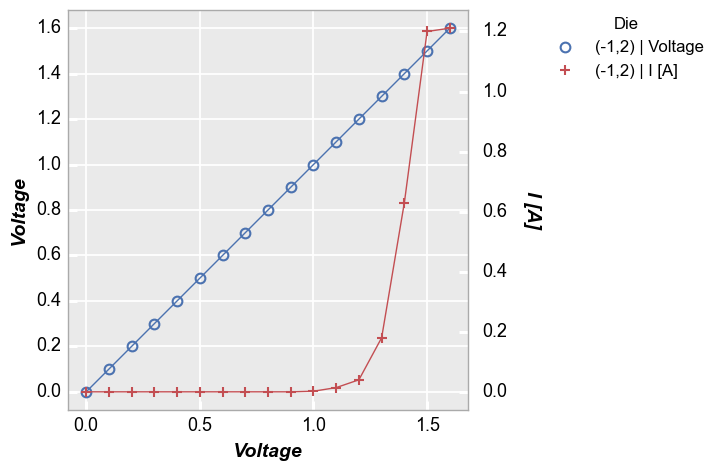

In [12]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major_y_increment=0.2)

For minor ticks however, it is easier to specify the number of minor ticks to use via the `ticks_minor_<x|y|x2|y2>_number` keyword.  The interval between minor ticks will then be calculated automatically. Setting the number of ticks automatically turns on the tick marks without setting `ticks_minor_<x|y|x2|y2>=True`.  <i>Note that this option only works for linearly scaled axis.  Minor log axis will always have 8 minor ticks with log spacing.</i>  

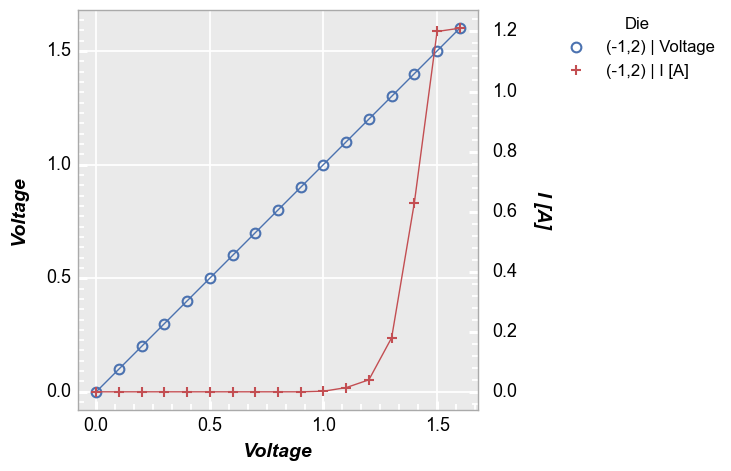

In [13]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_minor_x_number=5, ticks_minor_y_number=10, ticks_minor_y2_number=4)

Or with a log scale on the y-axis (notice the number keywords for the y-axis are ignored):

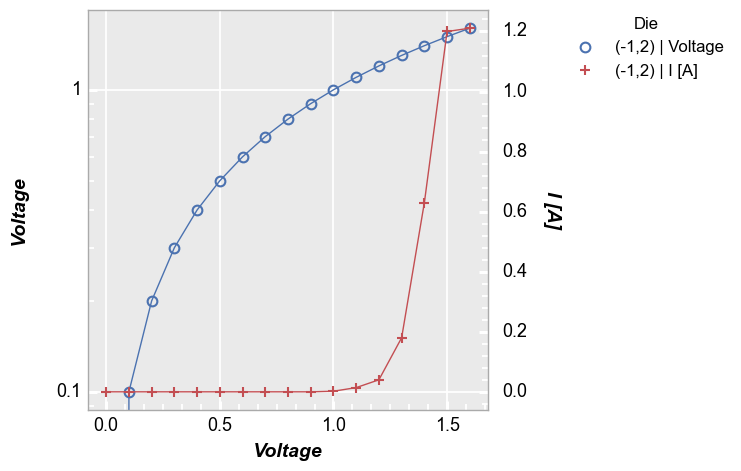

In [14]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_minor_x_number=5, ticks_minor_y_number=10, ticks_minor_y2_number=4, ax_scale='logy', ax2_scale='linear')

## Tick labels

### General comments

In addition to tick markers, we can control the labels associated with those markers for both major and minor axes. Note the following:
<ul>
<li>Tick marks are automatically enabled if tick labels are enabled</li>
<li>Tick labels are not automatically enbaled when tick marks are enabled, but they are automatically disabled if tick marks are disabled</li>
<li>Major tick labels are always on by default unless shut off intentionally</li>
<li>Minor tick labels are always off by default and must be turned on intentionally</li>
</ul>

<b>Turn off all ticks</b><br>
(Notice the labels are also turned off)

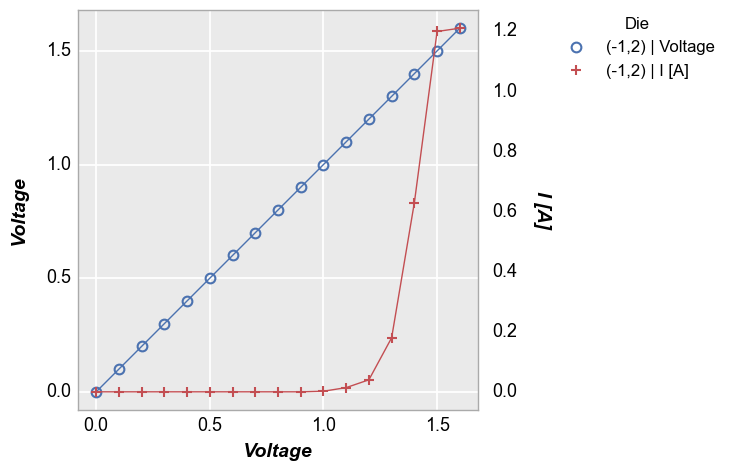

In [15]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major=False)

<b>Turn on minor ticks</b><br>
This is done using the `tick_labels_minor` family of keywords:

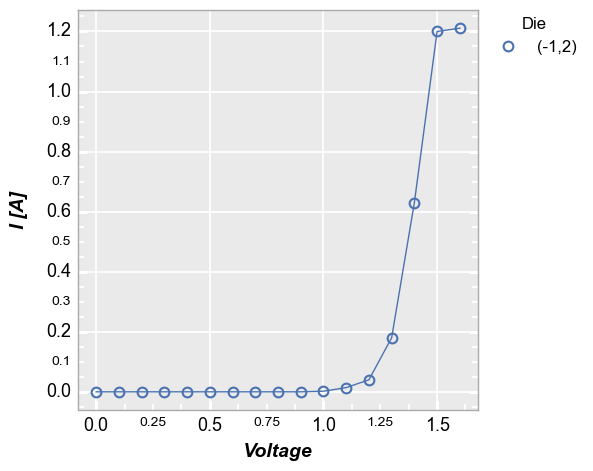

In [16]:
fcp.plot(df=df, x='Voltage', y='I [A]', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True)

### Tick cleanup

One issue with tick labels is the potential for overlap depeding on the number of ticks displayed and the size of the plot.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> employs an algorithm that looks for tick label collision problems within a plot and between subplots and throws out certain labels while leaving the actual tick mark intact.  Consider the following example:

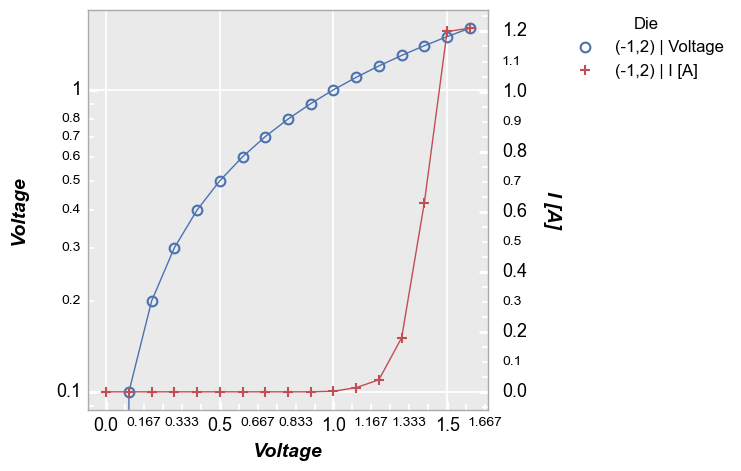

In [17]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5)

Notice that not all ticks have labels, but not all ticks have labels.  For instance, the x-axis has 5 ticks as specified by `ticks_major_x_number=5`, but only the 2nd and 4th tick labels are displayed.  This is the result of tick cleanup.  We can disable the cleanup algorithm by setting the keyword `tick_cleanup=False`.  This may produce an undesirable result:

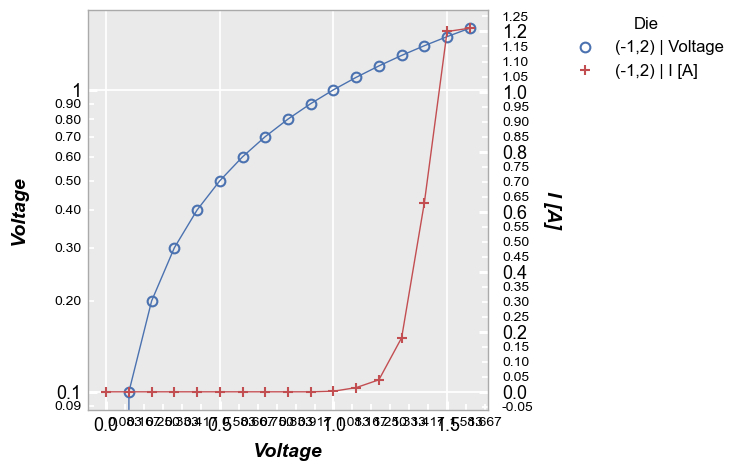

In [18]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5, tick_cleanup=False)

To fit more tick labels in, try increasing the axes size and rotating the tick labels (if applicable):

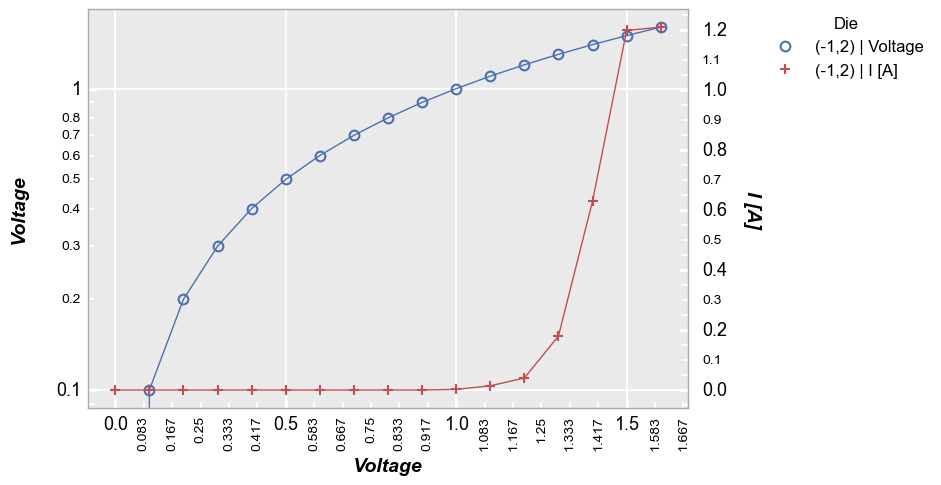

In [19]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5,
         ax_size=[600,400], tick_labels_minor_x_rotation=90)  #### Y2 TICKS!

### Scientific notation

#### Linear scale axis

By default, <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> will attempt to make an intelligent decision about how to display tick labels when the range of data and/or the discrete tick values are very small/large.  Consider the following example with very small `y` values.  Notice that the values on the y axis default to exponential notation rather than explictly writing out 18 zeros after the decimal place.

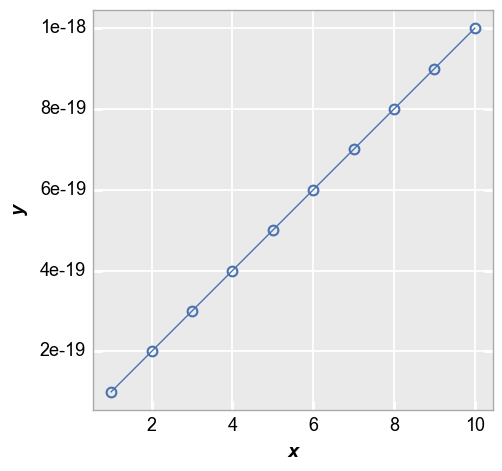

In [20]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E-19, 1E-18, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y')

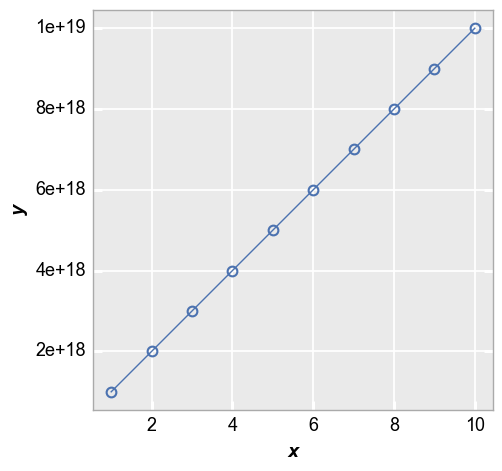

In [21]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E18, 1E19, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y')

You can disable the auto-formatting of ticks by setting the keywords `sci_x` and/or `sci_y` to `False`.  In this particular example, this would be a really poor choice.

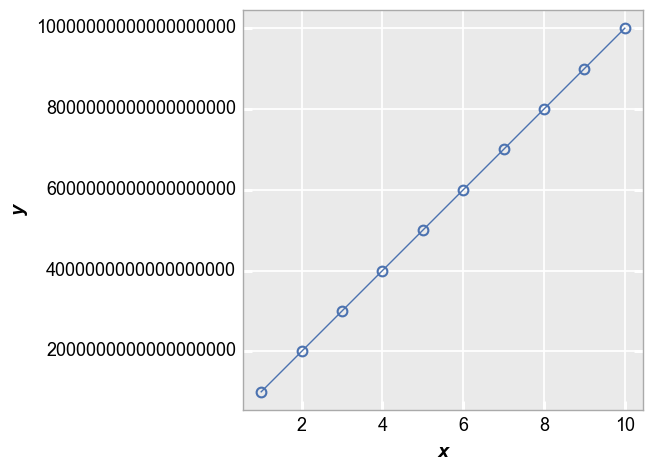

In [22]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E18, 1E19, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y', sci_y=False)

#### Log scale axis

Now consider the following log-scaled plot.  By default, the major tick labels for a log axis are powers of 10 if the values are large.

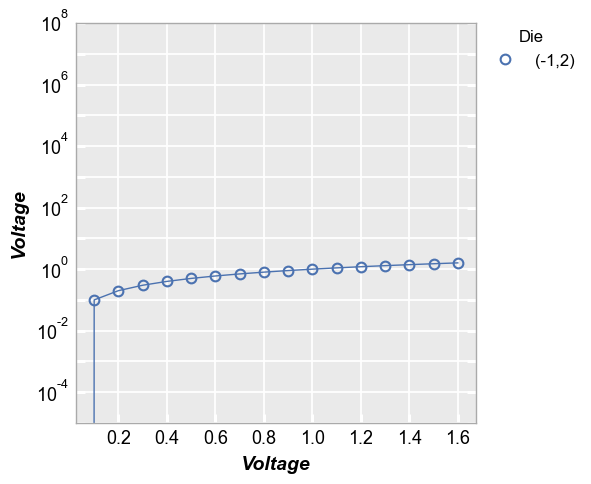

In [23]:
fcp.plot(df=df, x='Voltage', y='Voltage', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000)

We can force the tick values to regular numerals as we did above by setting the keywords `sci_x` and/or `sci_y` to `False`. 

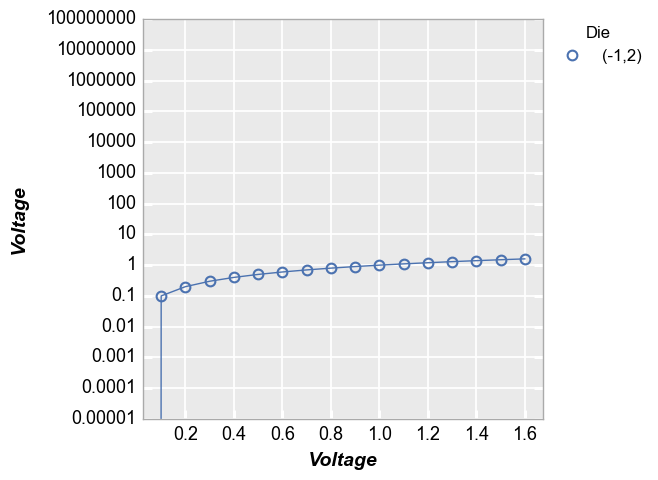

In [24]:
fcp.plot(df=df, x='Voltage', y='Voltage', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000, sci_y=False)

We can force tick marks of a log-scaled axis to exponential notation by setting the keywords `sci_x` and/or `sci_y` to `True`.

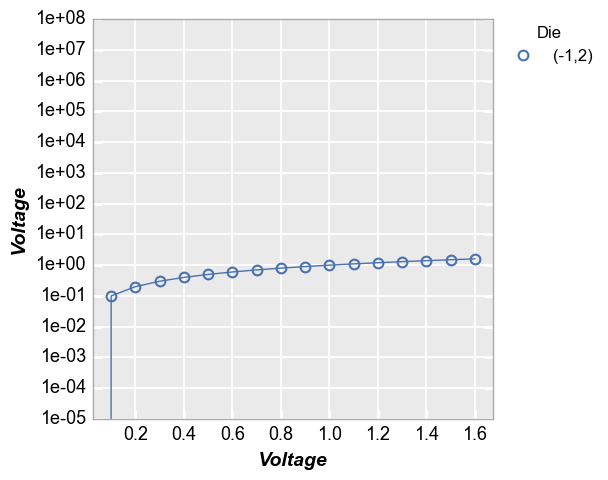

In [25]:
fcp.plot(df=df, x='Voltage', y='Voltage', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000, sci_y=True)

#### Colorbar

We can force scientific notation on the color bar axis by setting the kwargs `sci_z=True`:

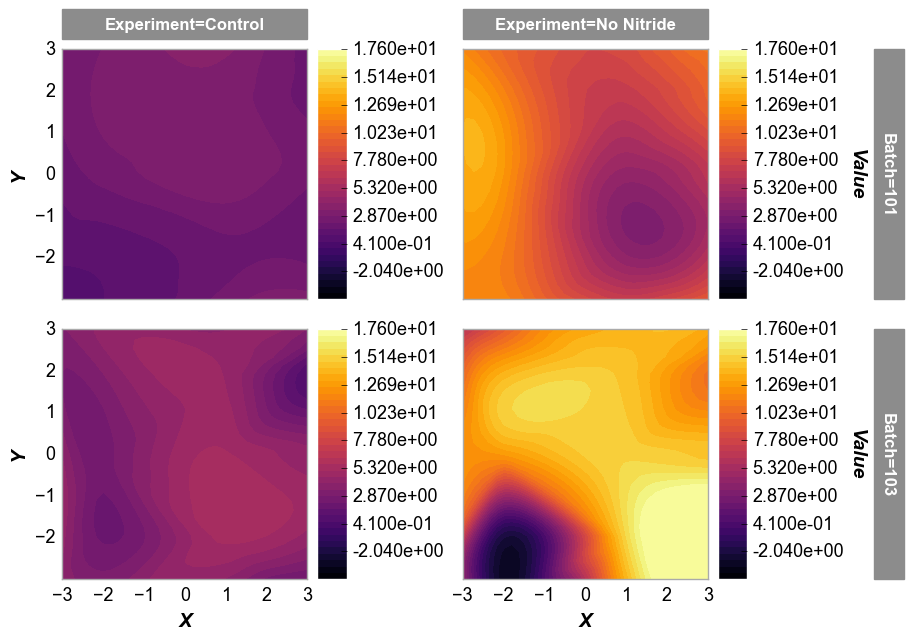

In [26]:
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_contour.csv'))
fcp.contour(df2, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=True,
            cbar=True, xmin=-3, xmax=3, ymin=-3, ymax=3, ax_size=[250,250], show=SHOW,
            label_rc_font_size=12, levels=40, sci_z=True)